In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Coords = (x, y, z, t, ring)
# ring means the channel (0 - 127)
# Coords (0, 0, 0) with range 0 are points that the LiDAR did not measure, so we should drop it.

puntos_1 = pd.read_csv('Data/1_coche.csv', sep=',')
carretera = pd.read_csv('Data/carretera.csv', sep=',')

puntos_1['range'] /= 1000  # Convertir a metros
carretera['range'] /= 1  # Convertir a metros
puntos_1 = puntos_1[(puntos_1['range'] > 0.) & (puntos_1['t'] < 1181241184)]
puntos_1['t'] *= 1e-6  # Convertir a milisegundos
carretera = carretera[(carretera['range'] > 0.) & (carretera['t'] < 1181241184)]
carretera['t'] *= 1e-6  # Convertir a milisegundos
puntos_1.sort_values(by=['t'])

x         y          z  intensity          t  reflectivity  \
28673  -23.156588  3.763544  10.663235       33.0   0.000000            13   
86017  -29.619130  4.560926  -7.710754       28.0   0.000000            20   
24577  -22.135288  3.668699  11.575400       26.0   0.000000            11   
77825  -28.192215  4.275608  -4.448342      172.0   0.000000            72   
33793  -16.786018  0.961068   6.451665       56.0   0.000000            11   
...           ...       ...        ...        ...        ...           ...   
26112    3.481961 -0.182875   1.769919      287.0  24.949368             4   
110080   3.682008  0.597857  -2.164261      105.0  24.949368             3   
13824    3.478094 -0.198378   2.484752      232.0  24.949368             3   
128512   2.161701 -0.129435  -2.031268      190.0  24.949368             3   
43520    4.636539  0.224632   1.240285      265.0  24.949368             6   

        ring  ambient   range  
28673     28     1933  25.757  
86017     84     3188  30.955  
24577     24     2115  25.233  
77825     76     3458  28.866  
33793     33      840  17.997  
...      ...      ...     ...  
26112     25      754   3.896  
110080   107      957   4.336  
13824     13      492   4.262  
128512   125     1769   3.003  
43520     42      532   4.796  

[57047 rows x 9 columns]

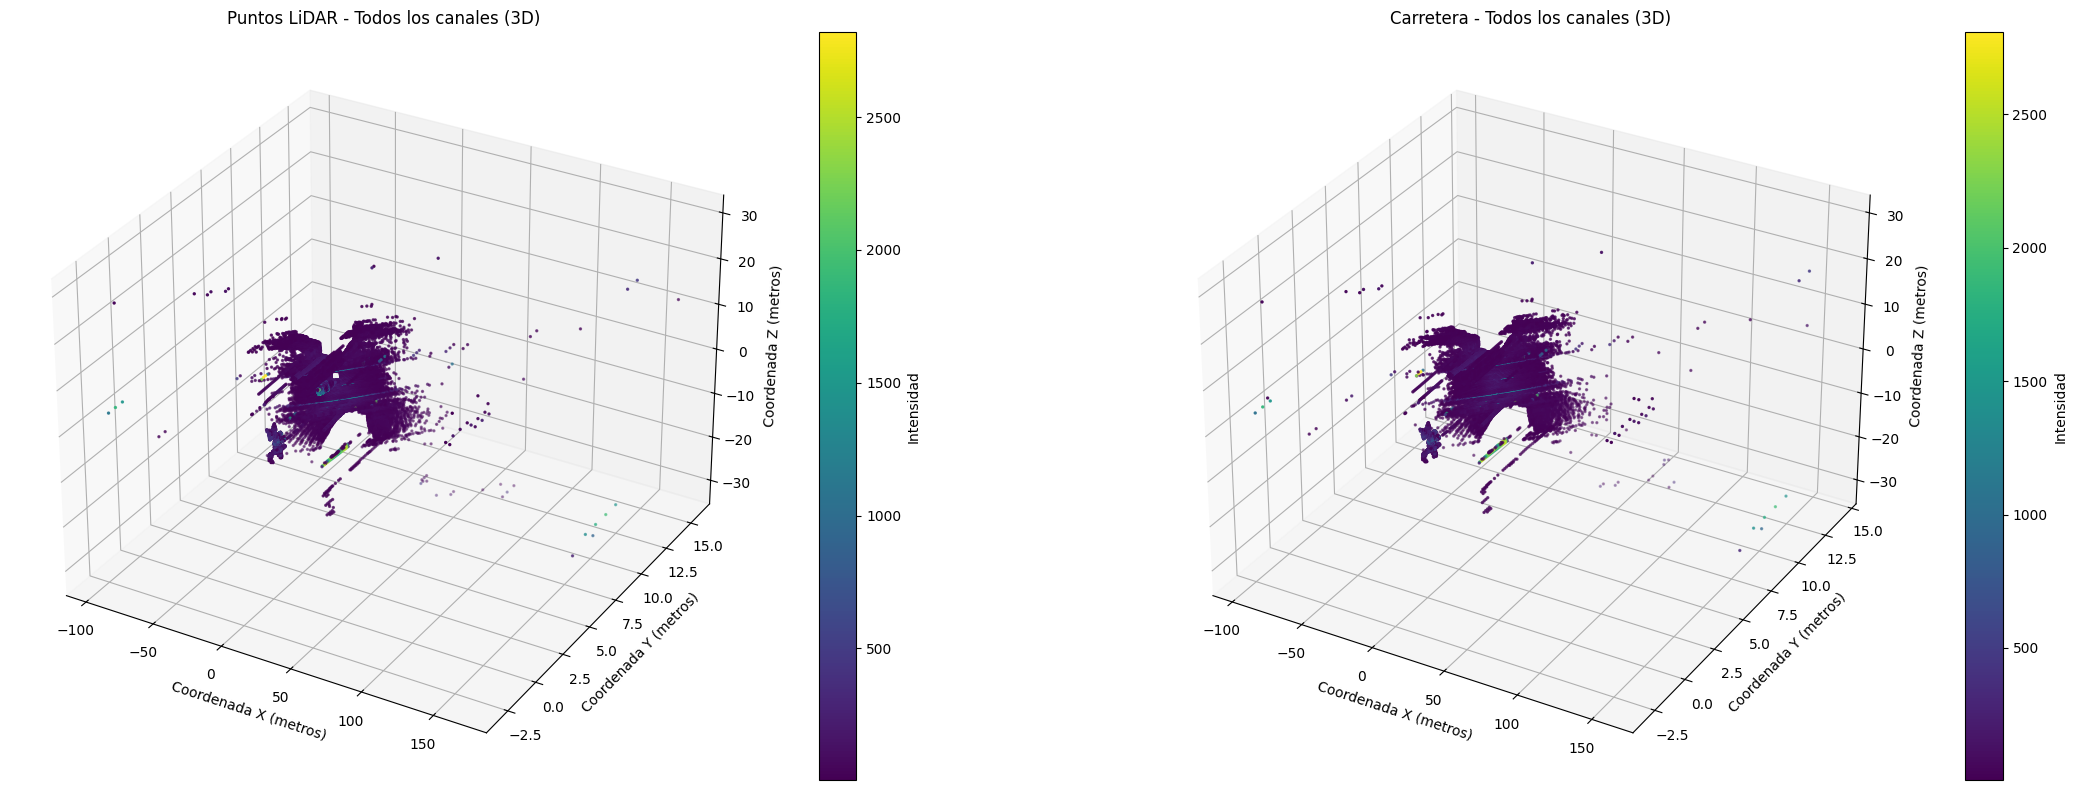

In [97]:
from mpl_toolkits.mplot3d import Axes3D

# Plot all points in a single scatter, coloring by intensity
# Adjust the layout so the two 3D plots are side by side
fig = plt.figure(figsize=(24, 8))

# First subplot (left)
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(
    puntos_1['x'],
    puntos_1['y'],
    puntos_1['z'],
    c=puntos_1['intensity'],
    cmap='viridis',
    s=2
)
fig.colorbar(sc, ax=ax, label='Intensidad')
ax.set_title('Puntos LiDAR - Todos los canales (3D)')
ax.set_xlabel('Coordenada X (metros)')
ax.set_ylabel('Coordenada Y (metros)')
ax.set_zlabel('Coordenada Z (metros)')

# Second subplot (right)
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(
    carretera['x'],
    carretera['y'],
    carretera['z'],
    c=carretera['intensity'],
    cmap='viridis',
    s=2
)
fig.colorbar(sc2, ax=ax2, label='Intensidad')
ax2.set_title('Carretera - Todos los canales (3D)')
ax2.set_xlabel('Coordenada X (metros)')
ax2.set_ylabel('Coordenada Y (metros)')
ax2.set_zlabel('Coordenada Z (metros)')

plt.tight_layout()
plt.show()


In [98]:
puntos_without_carretera = puntos_1.merge(
	carretera[['x', 'y', 'z']],
	on=['x', 'y', 'z'],
	how='left',
	indicator=True
)
puntos_without_carretera = puntos_without_carretera[puntos_without_carretera['_merge'] == 'left_only']
puntos_without_carretera = puntos_without_carretera.drop(columns=['_merge'])
puntos_without_carretera

x         y          z  intensity          t  reflectivity  \
0     -13.000649  2.733196  13.144561       14.0   0.099080             3   
1     -12.894675  2.793606  13.054574       12.0   0.150920             2   
2     -12.856470  2.868021  13.033484       23.0   0.194512             4   
3     -12.871898  2.954502  13.067228       17.0   0.248632             3   
4     -12.926430  3.218639  13.180415       11.0   0.392472             2   
...          ...       ...        ...        ...        ...           ...   
57042  10.932133  3.238086 -11.504787     2542.0  24.173168           176   
57043  10.943031  3.168405 -11.495528     2583.0  24.221328           179   
57044  10.930527  3.092206 -11.462051     2452.0  24.267128           170   
57045  10.897206  3.010663 -11.407207     1825.0  24.313688           146   
57046  10.983234  2.962049 -11.478434      180.0  24.363528            41   

       ring  ambient   range  
0         0      649  18.670  
1         0      702  18.542  
2         0      546  18.512  
3         0      674  18.560  
4         0      599  18.721  
...     ...      ...     ...  
57042   127     1679  16.233  
57043   127     1874  16.220  
57044   127     1958  16.173  
57045   127     3053  16.096  
57046   127     3958  16.196  

[55823 rows x 9 columns]

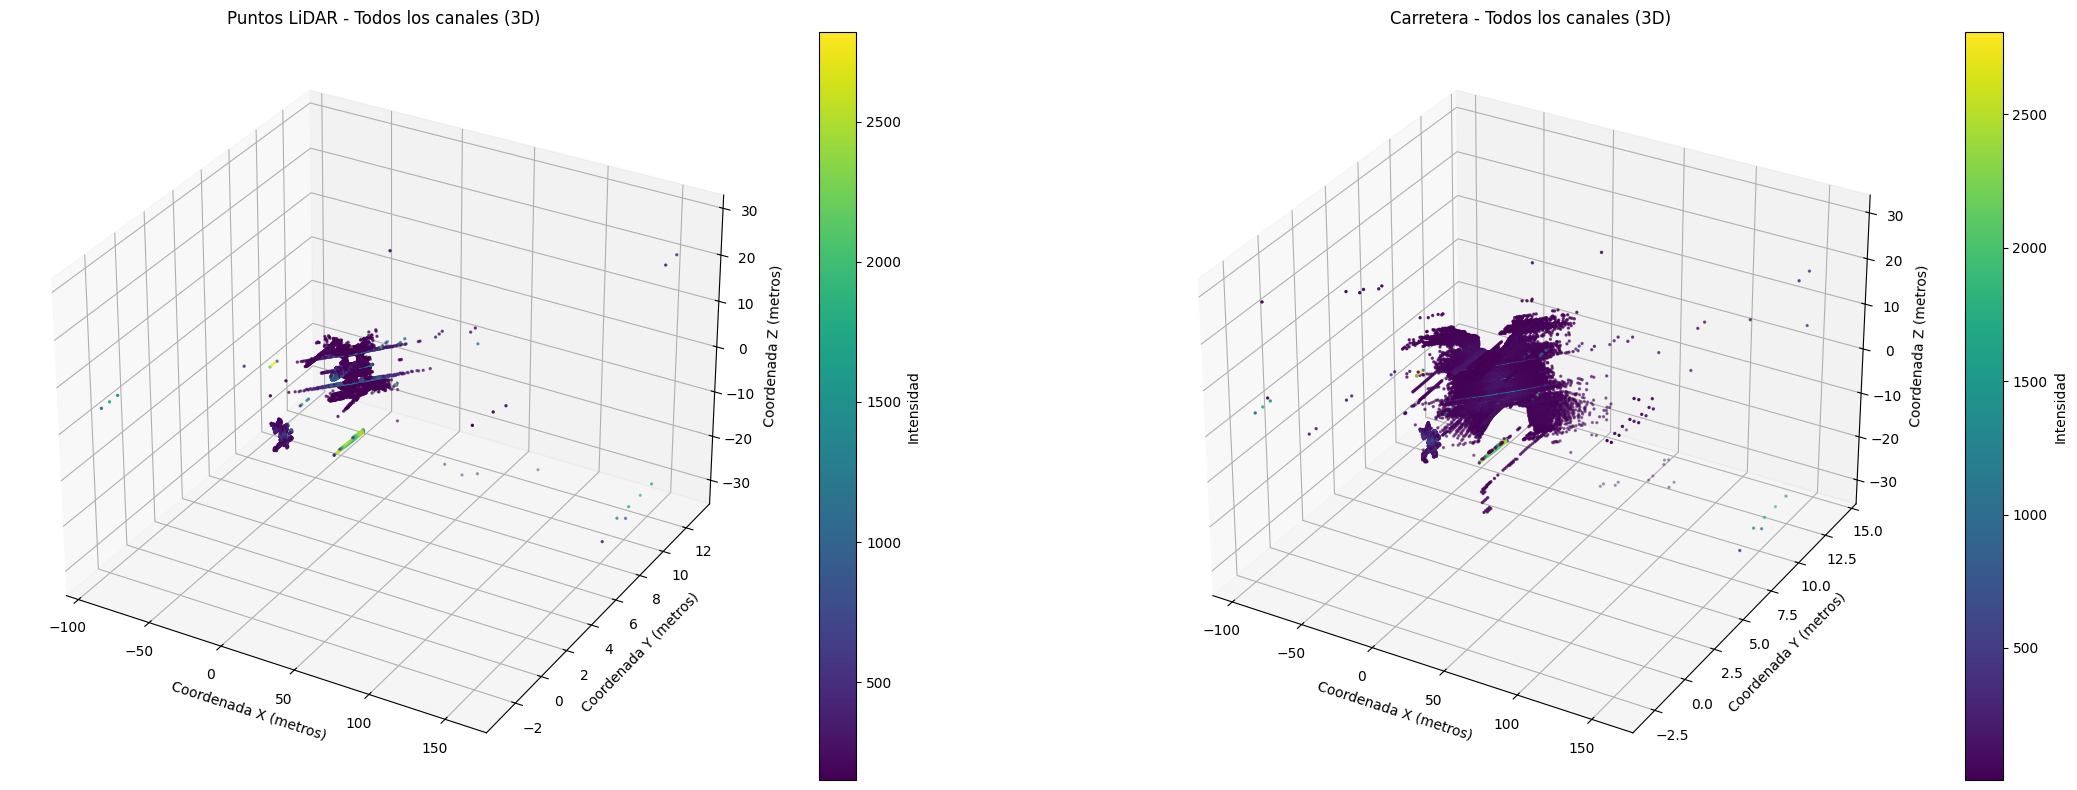

In [99]:
from mpl_toolkits.mplot3d import Axes3D

puntos_filtro_intensidad = puntos_1[puntos_1['intensity'] > 150]
fig = plt.figure(figsize=(24, 8))

# First subplot (left)
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(
    puntos_filtro_intensidad['x'],
    puntos_filtro_intensidad['y'],
    puntos_filtro_intensidad['z'],
    c=puntos_filtro_intensidad['intensity'],
    cmap='viridis',
    s=2
)
fig.colorbar(sc, ax=ax, label='Intensidad')
ax.set_title('Puntos LiDAR - Todos los canales (3D)')
ax.set_xlabel('Coordenada X (metros)')
ax.set_ylabel('Coordenada Y (metros)')
ax.set_zlabel('Coordenada Z (metros)')

# Second subplot (right)
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(
    carretera['x'],
    carretera['y'],
    carretera['z'],
    c=carretera['intensity'],
    cmap='viridis',
    s=2
)
fig.colorbar(sc2, ax=ax2, label='Intensidad')
ax2.set_title('Carretera - Todos los canales (3D)')
ax2.set_xlabel('Coordenada X (metros)')
ax2.set_ylabel('Coordenada Y (metros)')
ax2.set_zlabel('Coordenada Z (metros)')

plt.tight_layout()
plt.show()


In [100]:
carretera.describe()

x             y             z     intensity             t  \
count  57317.000000  57317.000000  57317.000000  57317.000000  57317.000000   
mean       0.205824      5.576111      0.091367    151.087601     12.509923   
std        9.189953      1.190740      5.010231    175.508169      6.456014   
min      -95.568890     -3.026819    -31.174494      5.000000      0.000000   
25%       -4.468840      5.412472     -3.108812     78.000000      7.033952   
50%        0.021570      5.743454      0.110335    120.000000     12.502160   
75%        4.248515      6.035828      3.334118    165.000000     17.972448   
max      158.681290     14.168045     29.415686   2807.000000     24.949488   

       reflectivity          ring       ambient         range  
count  57317.000000  57317.000000  57317.000000  57317.000000  
mean       9.632814     62.616798   1718.183872     10.261884  
std       13.229473     36.678056   1017.813909      6.071746  
min        1.000000      0.000000    259.000000      2.236000  
25%        5.000000     31.000000   1194.000000      6.766000  
50%        6.000000     62.000000   1419.000000      8.167000  
75%        9.000000     94.000000   1988.000000     11.692000  
max      255.000000    127.000000  10511.000000    161.177000

In [101]:
puntos_1.describe()

x             y             z     intensity             t  \
count  57047.000000  57047.000000  57047.000000  57047.000000  57047.000000   
mean       0.198721      5.504633      0.051327    180.941627     12.510500   
std        9.205485      1.223905      5.030193    241.428405      6.475789   
min      -95.591150     -3.026484    -31.093044      5.000000      0.000000   
25%       -4.516991      5.268458     -3.137636     75.000000      6.984152   
50%        0.042466      5.730175      0.043796    121.000000     12.504560   
75%        4.271642      6.036360      3.353750    169.000000     17.972768   
max      167.198500     15.588192     29.421364   2819.000000     24.949368   

       reflectivity          ring       ambient         range  
count  57047.000000  57047.000000  57047.000000  57047.000000  
mean      10.582555     62.764966   1974.136554     10.218332  
std       13.980172     36.753102   1653.938305      6.125922  
min        1.000000      0.000000    253.000000      2.214000  
25%        5.000000     30.000000   1195.000000      6.787000  
50%        6.000000     63.000000   1515.000000      8.189000  
75%       10.000000     94.000000   2271.000000     11.732500  
max      255.000000    127.000000  65535.000000    168.365000

In [119]:
#Do a 3D scatter interactively with plotly
import plotly.express as px
fig = px.scatter_3d(puntos_both, x='x', y='y', z='z', color='intensity_x', title='Puntos LiDAR - Todos los canales (3D)', labels={'x':'Coordenada X (metros)', 'y':'Coordenada Y (metros)', 'z':'Coordenada Z (metros)', 'intensity':'Intensidad'})
fig.update_traces(marker=dict(size=2))
fig.show()

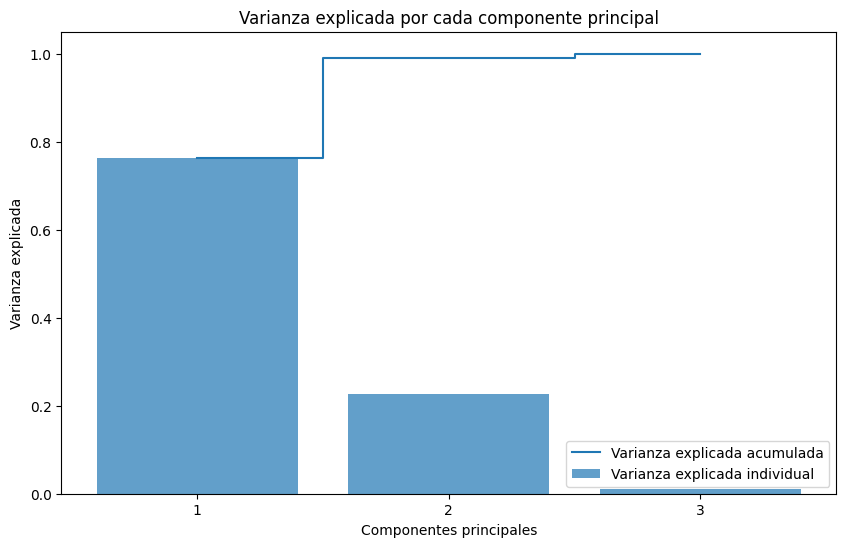

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_carretera = carretera[['x', 'y', 'z']]

data_carretera_normalized = data_carretera - data_carretera.mean() #centering data
pca.fit(data_carretera_normalized)
normal = pca.components_[-1]

#plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), pca.explained_variance_ / np.var(data_carretera_normalized, axis=0).sum(), alpha=0.7, align='center', label='Varianza explicada individual')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ / np.var(data_carretera_normalized, axis=0).sum()), where='mid', label='Varianza explicada acumulada')
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.xticks(range(1, 4))
plt.legend(loc='best')
plt.title('Varianza explicada por cada componente principal')
plt.show()

In [104]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

X = data_carretera[['x','y']].values
y = data_carretera['z'].values

ransac = RANSACRegressor(LinearRegression(), residual_threshold=0.5)
ransac.fit(X, y)

a, b = ransac.estimator_.coef_
c = ransac.estimator_.intercept_

print(f"Plano RANSAC: z = {a:.4f}*x + {b:.4f}*y + {c:.4f}")


Plano RANSAC: z = 1.3513*x + -22.3183*y + 129.5353


In [113]:

# Calculate zz as before
xx, yy = np.meshgrid(
    np.linspace(data_carretera['x'].min(), data_carretera['x'].max(), 10),
    np.linspace(data_carretera['y'].min(), data_carretera['y'].max(), 10)
)
# D = -(a*x0 + b*y0 + c*z0)
# zz = (-D - a*xx - b*yy) / c

zz = a*xx + b*yy + c

# Limit zz to the max value of real z
z_max = data_carretera['z'].max()
z_min = data_carretera['z'].min()
zz = np.maximum(zz, z_min)
zz = np.minimum(zz, z_max)

import plotly.graph_objects as go

scatter = go.Scatter3d(
    x=puntos_1['x'],
    y=puntos_1['y'],
    z=puntos_1['z'],
    mode='markers',
    marker=dict(size=2, color='blue'),
    name='Puntos de la carretera'
)

# surface = go.Surface(
#     x=xx,
#     y=yy,
#     z=zz,
#     colorscale='Reds',
#     opacity=0.5,
#     showscale=False,
#     name='Plano RANSAC'
# )

fig = go.Figure(data=scatter)
fig.update_layout(
    title='Ajuste de plano a los puntos de la carretera usando RANSAC',
    scene=dict(
        xaxis_title='Coordenada X (metros)',
        yaxis_title='Coordenada Y (metros)',
        zaxis_title='Coordenada Z (metros)'
    ),
    legend=dict(itemsizing='constant')
)
fig.show()

In [118]:
puntos_1['x'] = np.round(puntos_1['x'], 1)
puntos_1['y'] = np.round(puntos_1['y'], 1)
puntos_1['z'] = np.round(puntos_1['z'], 1)

carretera['x'] = np.round(carretera['x'], 1)
carretera['y'] = np.round(carretera['y'], 1)
carretera['z'] = np.round(carretera['z'], 1)

# 'how' must be one of 'left', 'right', 'outer', 'inner'
puntos_both = puntos_1.merge(carretera, on=['x', 'y', 'z'], how='left', indicator=True)

puntos_both = puntos_both.drop_duplicates(subset=['x', 'y', 'z'])
puntos_both

x    y     z  intensity_x        t_x  reflectivity_x  ring_x  \
0      -13.0  2.7  13.1         14.0   0.099080               3       0   
1      -12.9  2.8  13.1         12.0   0.150920               2       0   
2      -12.9  2.9  13.0         23.0   0.194512               4       0   
3      -12.9  3.0  13.1         17.0   0.248632               3       0   
4      -12.9  3.2  13.2         11.0   0.392472               2       0   
...      ...  ...   ...          ...        ...             ...     ...   
105477  10.9  3.3 -11.5       2598.0  24.121568             180     127   
105478  10.9  3.2 -11.5       2542.0  24.173168             176     127   
105482  10.9  3.1 -11.5       2452.0  24.267128             170     127   
105483  10.9  3.0 -11.4       1825.0  24.313688             146     127   
105484  11.0  3.0 -11.5        180.0  24.363528              41     127   

        ambient_x  range_x     pred_z   residual  intensity_y        t_y  \
0             649   18.670  51.709501  38.609501          NaN        NaN   
1             702   18.542  49.612796  36.512796         18.0   0.142080   
2             546   18.512  47.380966  34.380966          NaN        NaN   
3             674   18.560  45.149135  32.049135         18.0   0.244880   
4             599   18.721  40.685474  27.485474         23.0   0.386632   
...           ...      ...        ...        ...          ...        ...   
105477       1908   16.253  70.613612  82.113612       2581.0  24.121608   
105478       1679   16.233  72.845442  84.345442       2556.0  24.171528   
105482       1958   16.173  75.077273  86.577273       2465.0  24.266808   
105483       3053   16.096  77.309103  88.709103       1799.0  24.315168   
105484       3958   16.196  77.444229  88.944229        184.0  24.366888   

        reflectivity_y  ring_y  ambient_y  range_y     _merge  
0                  NaN     NaN        NaN      NaN  left_only  
1                  4.0     0.0      737.0   18.611       both  
2                  NaN     NaN        NaN      NaN  left_only  
3                  3.0     0.0      726.0   18.571       both  
4                  4.0     0.0      655.0   18.712       both  
...                ...     ...        ...      ...        ...  
105477           179.0   127.0     1901.0   16.253       both  
105478           177.0   127.0     1723.0   16.231       both  
105482           170.0   127.0     2018.0   16.182       both  
105483           145.0   127.0     3092.0   16.094       both  
105484            43.0   127.0     4270.0   16.244       both  

[37552 rows x 18 columns]

In [107]:
X = puntos_1[['x','y']].values

pred_z = ransac.predict(X)

puntos_1['pred_z'] = pred_z
puntos_1['residual'] = abs(puntos_1['z'] - puntos_1['pred_z'])
puntos_no_plano = puntos_1[puntos_1['residual'] > 7]
puntos_no_plano

x    y     z  intensity          t  reflectivity  ring  ambient  \
3      -13.0  2.7  13.1       14.0   0.099080             3     0      649   
4      -12.9  2.8  13.1       12.0   0.150920             2     0      702   
5      -12.9  2.9  13.0       23.0   0.194512             4     0      546   
6      -12.9  3.0  13.1       17.0   0.248632             3     0      674   
9      -12.9  3.2  13.2       11.0   0.392472             2     0      599   
...      ...  ...   ...        ...        ...           ...   ...      ...   
130544  10.9  3.2 -11.5     2542.0  24.173168           176   127     1679   
130545  10.9  3.2 -11.5     2583.0  24.221328           179   127     1874   
130546  10.9  3.1 -11.5     2452.0  24.267128           170   127     1958   
130547  10.9  3.0 -11.4     1825.0  24.313688           146   127     3053   
130548  11.0  3.0 -11.5      180.0  24.363528            41   127     3958   

         range     pred_z   residual  
3       18.670  51.709501  38.609501  
4       18.542  49.612796  36.512796  
5       18.512  47.380966  34.380966  
6       18.560  45.149135  32.049135  
9       18.721  40.685474  27.485474  
...        ...        ...        ...  
130544  16.233  72.845442  84.345442  
130545  16.220  72.845442  84.345442  
130546  16.173  75.077273  86.577273  
130547  16.096  77.309103  88.709103  
130548  16.196  77.444229  88.944229  

[13372 rows x 11 columns]

In [108]:

# Calculate zz as before
xx, yy = np.meshgrid(
    np.linspace(data_carretera['x'].min(), data_carretera['x'].max(), 10),
    np.linspace(data_carretera['y'].min(), data_carretera['y'].max(), 10)
)
# D = -(a*x0 + b*y0 + c*z0)
# zz = (-D - a*xx - b*yy) / c

zz = a*xx + b*yy + c

# Limit zz to the max value of real z
z_max = data_carretera['z'].max()
z_min = data_carretera['z'].min()
zz = np.maximum(zz, z_min)
zz = np.minimum(zz, z_max)

import plotly.graph_objects as go

scatter = go.Scatter3d(
    x=puntos_no_plano['x'],
    y=puntos_no_plano['y'],
    z=puntos_no_plano['z'],
    mode='markers',
    marker=dict(size=2, color='blue'),
    name='Puntos de la carretera'
)

# surface = go.Surface(
#     x=xx,
#     y=yy,
#     z=zz,
#     colorscale='Reds',
#     opacity=0.5,
#     showscale=False,
#     name='Plano RANSAC'
# )

fig = go.Figure(data=[scatter, surface])
fig.update_layout(
    title='Ajuste de plano a los puntos de la carretera usando RANSAC',
    scene=dict(
        xaxis_title='Coordenada X (metros)',
        yaxis_title='Coordenada Y (metros)',
        zaxis_title='Coordenada Z (metros)'
    ),
    legend=dict(itemsizing='constant')
)
fig.show()

In [109]:
len(puntos_1['x'].unique()), len(puntos_1['y'].unique()), len(puntos_1['z'].unique())

(765, 124, 354)

In [110]:
import numpy as np

xx = np.linspace(puntos_1['x'].min(), puntos_1['x'].max(), 30000)

In [120]:
#Do a 3D scatter interactively with plotly
import plotly.express as px
fig = px.scatter_3d(puntos_both, x='x', y='y', z='z', color='intensity_x', title='Puntos LiDAR - Todos los canales (3D)', labels={'x':'Coordenada X (metros)', 'y':'Coordenada Y (metros)', 'z':'Coordenada Z (metros)', 'intensity':'Intensidad'})
fig.update_traces(marker=dict(size=2))
fig.show()

In [ ]:
puntos_both['final_intensity'] = puntos_both['intensity_x'] - puntos_both['intensity_y']
puntos_both['final_intensity'] = np.clip(puntos_both['final_intensity'], 0, None)